# MAKE GRID - NOTEBOOK VERSION

In [1]:
#Allows widget interactivity with user
%matplotlib widget  
%load_ext autoreload
%autoreload 2

# Import standard modules
import os
import sys
import numpy as np

# Configure import paths
#os.environ['ETS_TOOLKIT'] = 'wx'
sys.path.extend(["./Modules/", "./Readers/", "./Modules/graphicUI_tools/"])

# Import third-party modules
import matplotlib.pyplot as plt
from scipy.spatial import distance
import ipywidgets as widgets
from ipywidgets import interact_manual, FloatText, VBox
from IPython.display import display

# Import custom modules
from tools_make_grid import inputs, inputs_smth, EasyGrid, GetMask, GetTopo
from croco_class import CROCO
from tools_grid_inputs import setup_widgets, prepare_variables
from tools_create_grids import create_classic_grid
from tools_grid_edition import (ValueUpdater, RectangleSelectorEdition,
                                MaskUpdater, plot_mask)

## ✏️🔧 User's changes

In [46]:
# Call the setup_widgets function to display the widgets and get the function to retrieve saved values
get_config= setup_widgets(parent_grid=False)

## 🧩🌐 Building the grid

In [56]:
# Get the config paramaters defined in the widgets + retain the ones useful for creating the grid
saved_config= get_config()
variables= prepare_variables(saved_config)

# Create the grid and saves it in "outputs"
grid, inputs = create_classic_grid(**variables)

Reading topography file: ../../DATASETS_CROCOTOOLS/Topo/etopo2.nc
Single region dataset imin/imax= 5534 6165
Bounding indices of the relevant part to be extracted from the entire dataset:
 imin,imax = 5534 6165 out of 10800 jmin,jmax = 1528 1963 out of 5400
Interpolating topography to CROCO grid

 Geographical extents of the dataset:
    Longitude min/max =    4.466667   25.500000
    Latitude  min/max =  -39.066666  -24.566668

 Geographical extents of requested ROMS grid:
    Longitude min/max =    4.511359   25.488641
    Latitude  min/max =  -39.031434  -24.631671

 Bounding indices for the portion of dataset covering the entire model grid:
 iwest,ieast =    2   631 out of   632 jsouth,jnorth =    2   434 out of   436

 Averaging window width = 2.00000 in grid spaces.

.........

 Wall Clock time spent to compute hraw    0.03 sec running   1 threads.
Finished interpolating
 enter smooth_thread r_max = 0.2000000  iters_cond =  500  iters_lin =    0
 set_tiles: nx =  40 ny =  39 numt

##### 💾 Save grid as necdf
This code creates a Netcdf file containing all grid data (geographic, topo-bathymetric, mask) in the format defined by the classes generated earlier in this notebook.   
Then it saves it in the ouput repertory. If you want to edit bathymetry/Mask you can save it later on this notebook.

In [100]:
CROCO.create_grid_nc(None, saved_config['output_file'], inputs, grid)

Writting ../../CROCO_FILES/croco_grd.nc done


## ✏️ Editing the grid's MASK and BATHYMETRY

### Editing bathymetry

#### Cell by cell edition mode

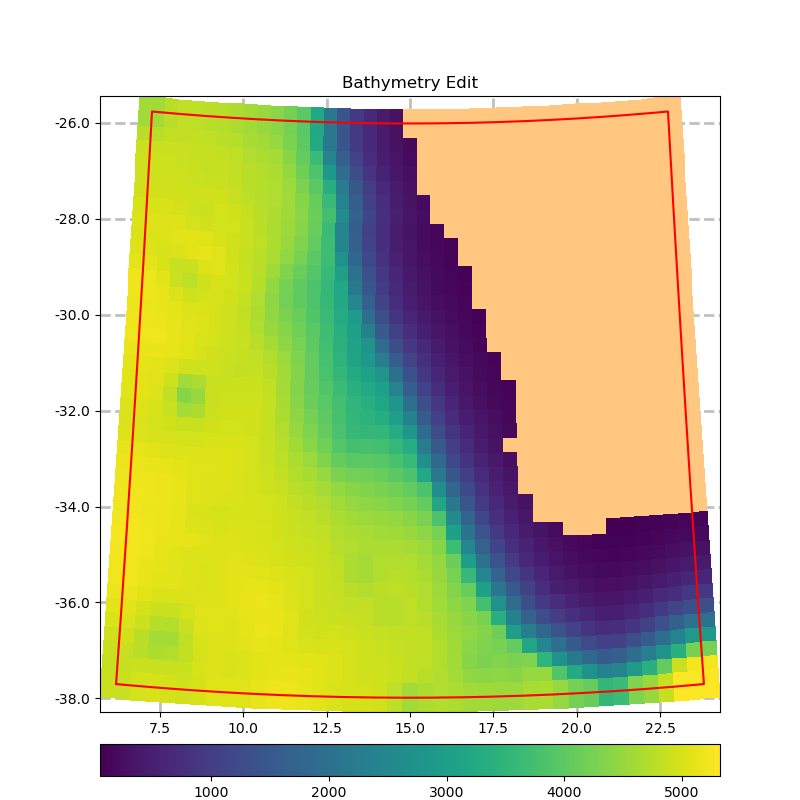

In [9]:
#Create an instance of the class ValueUpdater (Value of the Topo)
figure_cell_updater= ValueUpdater(grid)

#### Rectangle selector edition mode

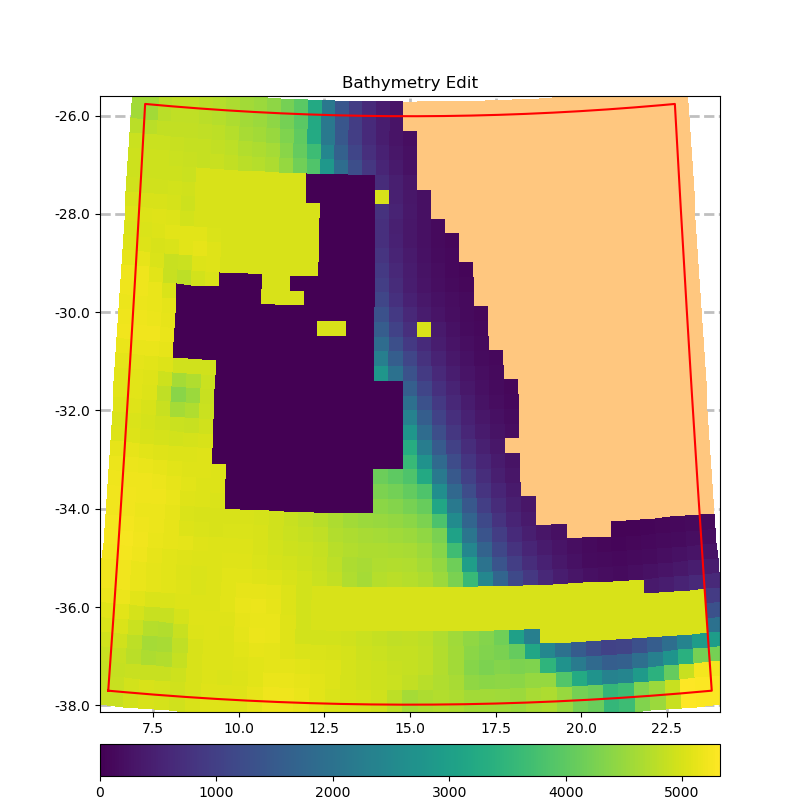

In [20]:
figure_cell_updater= RectangleSelectorEdition(grid)

### Editing Mask

#### Cell by cell edition mode

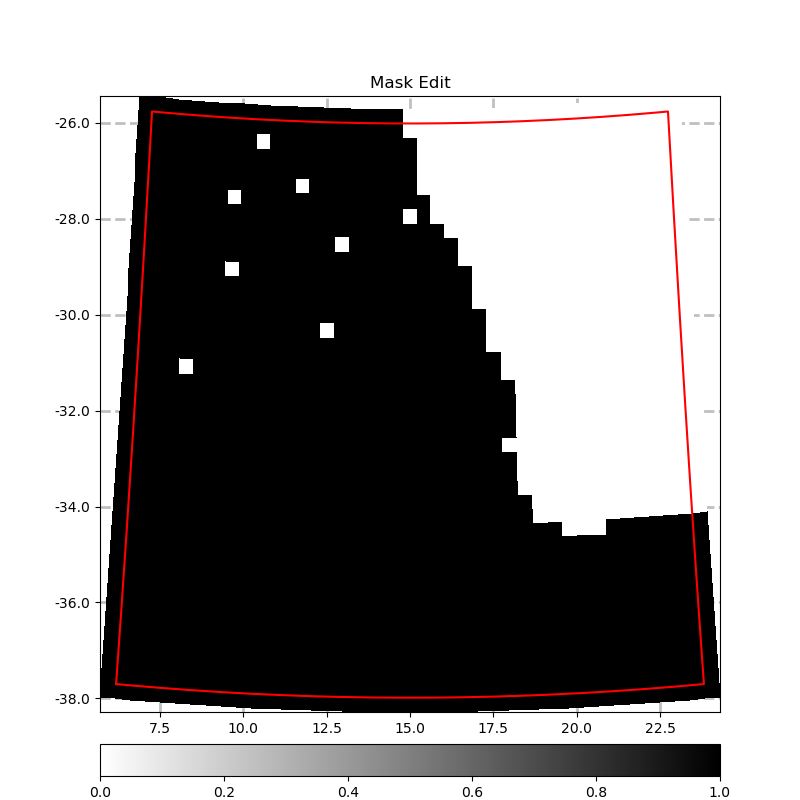

In [83]:
#Create an instance of the class MaskUpdater
figure_maskcell_updater= MaskUpdater(grid)

##### 💾 Save grid as necdf
This code creates a Netcdf file containing all grid data (geographic, topo-bathymetric, mask) in the format defined by the classes generated earlier in this notebook.   
Then it saves it in the ouput repertory. If you want to edit bathymetry/Mask you can save it later on this notebook.

In [96]:
CROCO.create_grid_nc(None, saved_config['output_file'], inputs, grid)

PermissionError: [Errno 13] Permission denied: '../../CROCO_FILES/croco_grd.nc'